Missing value, outlier treatment (EDA analysis aswell).

# 🧾 Problem Statement:
### Optimizing Inventory Management for Tops Liquor Stores in South Africa

Tops, a leading liquor retail chain in South Africa, operates across multiple store locations and carries a wide variety of alcoholic beverages. The brand seeks to optimize its inventory management system to enhance operational efficiency, reduce carrying costs, and ensure product availability across all its stores.

Currently, inventory data is scattered across various sources including purchase records, sales data, opening stock levels, and individual store information. However, the absence of a centralized, predictive system often results in **stockouts**, **overstocking**, and inefficient **reorder processes**—negatively impacting sales and increasing operational costs.

The goal of this project is to develop a data-driven inventory management solution for Tops that:

- Accurately forecasts product demand at each store based on historical sales and seasonality.
- Optimizes stock levels to avoid both overstocking and stockouts.
- Provides intelligent reorder recommendations to streamline procurement.
- Supports better inventory visibility across the Tops network of stores.

Using available datasets on inventory, purchases, sales, and store locations, this system will help Tops make smarter inventory decisions and better align stock levels with customer demand.

## Missing value treatment

In [21]:
import pandas as pd
from datetime import datetime

# Load all CSV files
inventory = pd.read_csv('../../Data/Processed/Inventory.csv')
opening_stock = pd.read_csv('../../Data/Processed/OpeningStock.csv')
purchases = pd.read_csv('../../Data/Processed/Purchases.csv')
sales = pd.read_csv('../../Data/Processed/Sales.csv')
stores = pd.read_csv('../../Data/Processed/Stores.csv')

# Function to print missing value summary
def print_missing_summary(df, name):
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())

# Print initial missing value summaries
print_missing_summary(inventory, 'Inventory')
print_missing_summary(opening_stock, 'OpeningStock')
print_missing_summary(purchases, 'Purchases')
print_missing_summary(sales, 'Sales')
print_missing_summary(stores, 'Stores')




Missing values in Inventory:
Brand          0
Description    0
dtype: int64

Missing values in OpeningStock:
Store        0
onHand       0
startDate    0
ItemId       0
dtype: int64

Missing values in Purchases:
Store            0
PODate           0
ReceivingDate    0
Quantity         0
ItemId           0
dtype: int64

Missing values in Sales:
Store            0
SalesQuantity    0
SalesDate        0
ItemId           0
dtype: int64

Missing values in Stores:
Store       0
Location    2
dtype: int64


In [22]:

# Stores.csv is the only one with missing values thus handle missing values
stores['Location'] = stores['Location'].fillna('Unknown')  # Fill missing Location with 'Unknown'

## Check for duplicates

We are not going to be checking for duplicate sales and purchases as this is a possible occurrence but not a mistake, as a certain purchase or sale could possibly happen.


## Data prep and load

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the datasets
def load_data():
    inventory = pd.read_csv('../../Data/Processed/Inventory.csv')
    opening_stock = pd.read_csv('../../Data/Processed/OpeningStock.csv')
    purchases = pd.read_csv('../../Data/Processed/Purchases.csv')
    sales = pd.read_csv('../../Data/Processed/Sales.csv')
    stores = pd.read_csv('../../Data/Processed/Stores.csv')
    
    # Standardize item identifier column names
    for df in [inventory, opening_stock, purchases, sales]:
        if 'ItemID' in df.columns:
            df.rename(columns={'ItemID': 'ItemId'}, inplace=True)
        elif 'item_id' in df.columns:
            df.rename(columns={'item_id': 'ItemId'}, inplace=True)
    
    # Convert date columns to datetime
    opening_stock['startDate'] = pd.to_datetime(opening_stock['startDate'])
    purchases['PODate'] = pd.to_datetime(purchases['PODate'])
    purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])
    sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
    
    return inventory, opening_stock, purchases, sales, stores

inventory, opening_stock, purchases, sales, stores = load_data()

## EDA analysis

In [24]:
# Do df.info(), df.describe() for each of the dataframes

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import pearsonr  # Import pearsonr to fix NameError

# Load the data
inventory = pd.read_csv('../../Data/Processed/Inventory.csv')
opening_stock = pd.read_csv('../../Data/Processed/OpeningStock.csv')
purchases = pd.read_csv('../../Data/Processed/Purchases.csv')
sales = pd.read_csv('../../Data/Processed/Sales.csv')
stores = pd.read_csv('../../Data/Processed/Stores.csv')

# # Basic data exploration
# print("Data Overview:")
# print(f"Number of unique items: {inventory['ItemId'].nunique()}")
# print(f"Number of stores: {stores['Store'].nunique()}")
# print(f"Sales date range: {sales['SalesDate'].min()} to {sales['SalesDate'].max()}")
# print(f"Purchase date range: {purchases['PODate'].min()} to {purchases['PODate'].max()}")

# Convert date columns to datetime
opening_stock['startDate'] = pd.to_datetime(opening_stock['startDate'])
purchases['PODate'] = pd.to_datetime(purchases['PODate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

# Merge stores with sales for location-based analysis
sales_with_location = pd.merge(sales, stores, on='Store')
purchases_with_location = pd.merge(purchases, stores, on='Store')

## Sales analysis

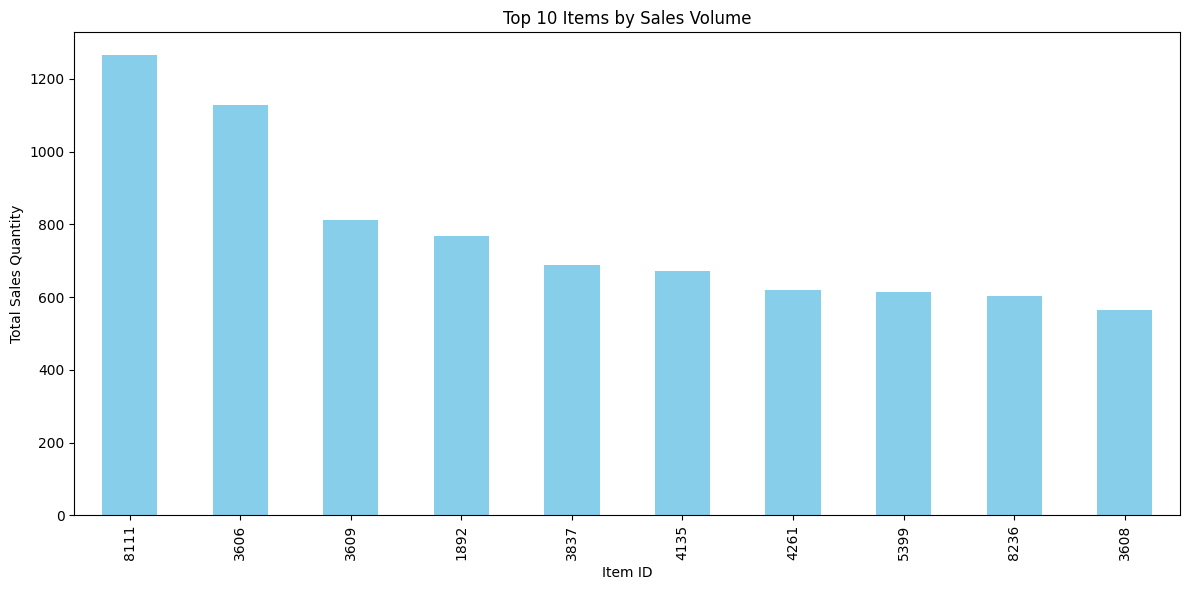

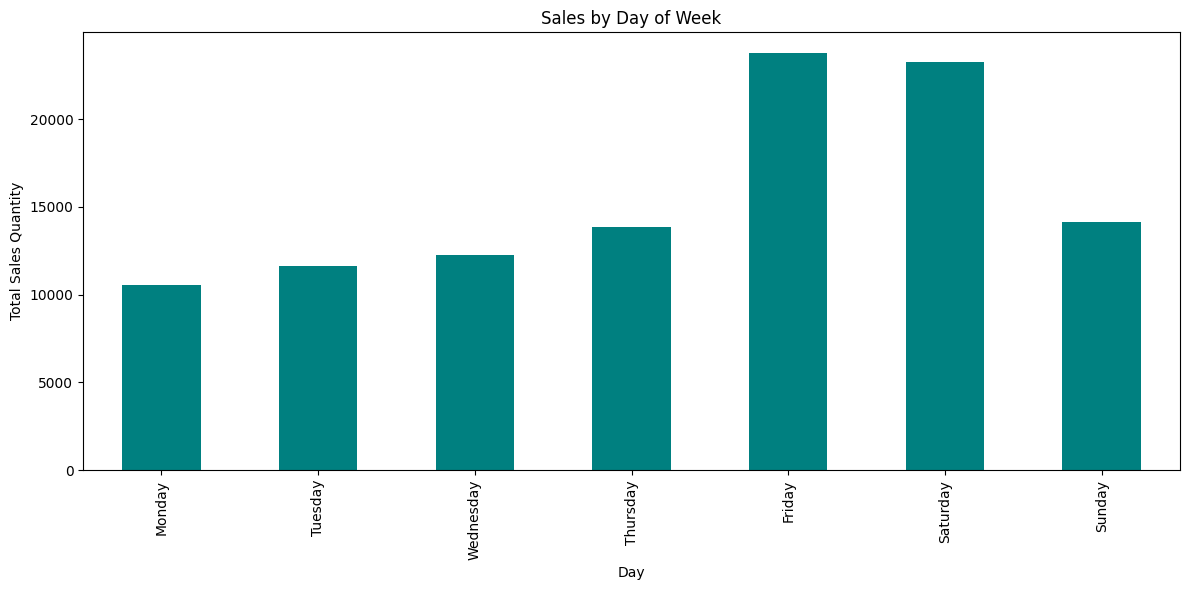

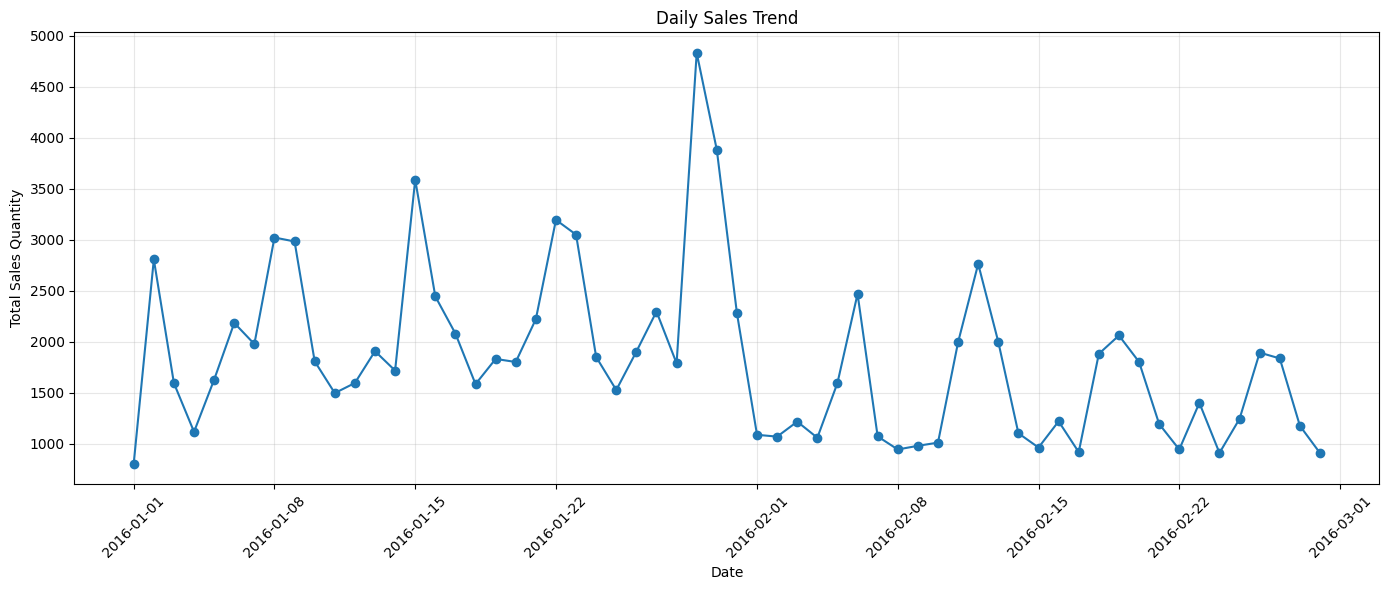

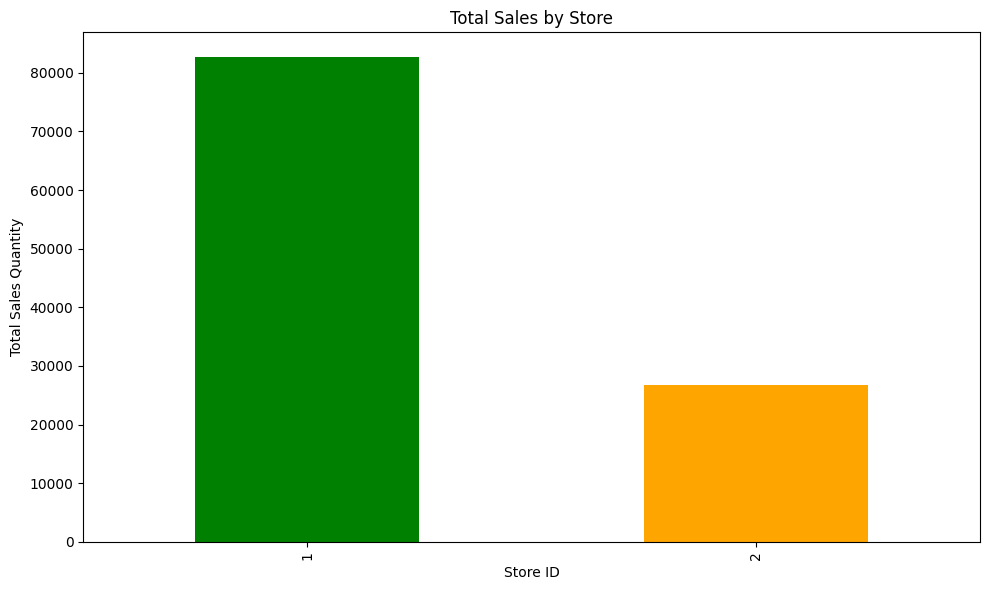

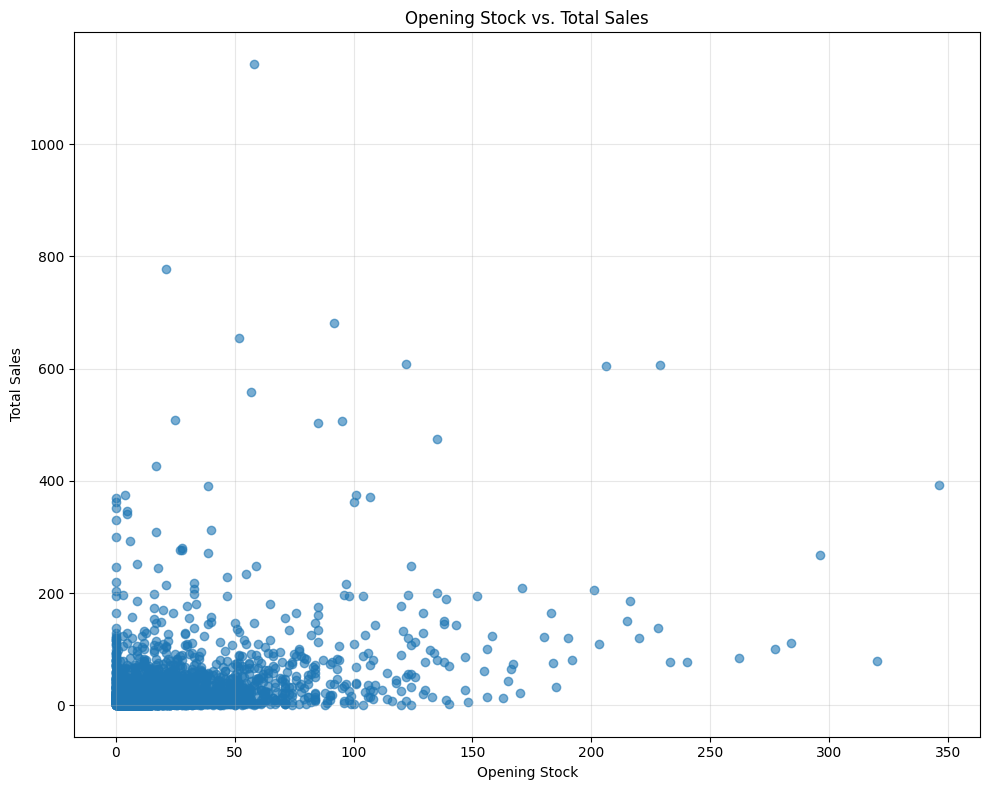

In [26]:
# 1. Top 10 Items by Sales Volume
top_items = sales.groupby('ItemId')['SalesQuantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Items by Sales Volume')
plt.xlabel('Item ID')
plt.ylabel('Total Sales Quantity')
plt.tight_layout()


# 7. Sales by Day of Week
sales['DayOfWeek'] = sales['SalesDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = sales.groupby('DayOfWeek')['SalesQuantity'].sum()
day_sales = day_sales.reindex(day_order)

plt.figure(figsize=(12, 6))
day_sales.plot(kind='bar', color='teal')
plt.title('Sales by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Sales Quantity')
plt.tight_layout()



# 2. Sales Trend Over Time
daily_sales = sales.groupby('SalesDate')['SalesQuantity'].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['SalesDate'], daily_sales['SalesQuantity'], marker='o', linestyle='-')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# 3. Store Comparison
store_sales = sales.groupby('Store')['SalesQuantity'].sum()
plt.figure(figsize=(10, 6))
store_sales.plot(kind='bar', color=['green', 'orange'])
plt.title('Total Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales Quantity')
plt.tight_layout()


# 10. Correlation between Opening Stock and Sales
item_store_opening = opening_stock.groupby(['Store', 'ItemId'])['onHand'].sum().reset_index()
item_store_sales = sales.groupby(['Store', 'ItemId'])['SalesQuantity'].sum().reset_index()

stock_vs_sales = pd.merge(item_store_opening, item_store_sales, on=['Store', 'ItemId'])

plt.figure(figsize=(10, 8))
plt.scatter(stock_vs_sales['onHand'], stock_vs_sales['SalesQuantity'], alpha=0.6)
plt.title('Opening Stock vs. Total Sales')
plt.xlabel('Opening Stock')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# # 10. Correlation between Opening Stock and Sales
# # Assuming opening_stock and sales DataFrames are already loaded
# item_store_opening = opening_stock.groupby(['Store', 'ItemId'])['onHand'].sum().reset_index()
# item_store_sales = sales.groupby(['Store', 'ItemId'])['SalesQuantity'].sum().reset_index()

# stock_vs_sales = pd.merge(item_store_opening, item_store_sales, on=['Store', 'ItemId'])

# # Filter out zero or negative values
# stock_vs_sales = stock_vs_sales[(stock_vs_sales['onHand'] > 0) & (stock_vs_sales['SalesQuantity'] > 0)]

# # Clip extreme values (using 98th percentile to focus on main data)
# stock_vs_sales = stock_vs_sales[(stock_vs_sales['onHand'] <= stock_vs_sales['onHand'].quantile(0.98)) &
#                                 (stock_vs_sales['SalesQuantity'] <= stock_vs_sales['SalesQuantity'].quantile(0.98))]

# # Calculate Pearson correlation coefficient
# corr, _ = pearsonr(stock_vs_sales['onHand'], stock_vs_sales['SalesQuantity'])

# # Create hexbin plot
# plt.figure(figsize=(10, 8))
# hb = plt.hexbin(stock_vs_sales['onHand'], stock_vs_sales['SalesQuantity'], 
#                 gridsize=30, cmap='Blues', mincnt=1)
# plt.colorbar(hb, label='Number of Items')

# # Fit and plot a trend line
# z = np.polyfit(stock_vs_sales['onHand'], stock_vs_sales['SalesQuantity'], 1)
# p = np.poly1d(z)
# plt.plot(stock_vs_sales['onHand'], p(stock_vs_sales['onHand']), color='red', linestyle='--', 
#          label=f'Trend Line (r={corr:.2f})')

# # Customize plot
# plt.title('Opening Stock vs. Total Sales', fontsize=14, pad=10)
# plt.xlabel('Opening Stock', fontsize=12)
# plt.ylabel('Total Sales', fontsize=12)
# plt.grid(True, alpha=0.3, linestyle='--')
# plt.legend()

# # Adjust layout and save
# plt.tight_layout()
# plt.savefig('stock_vs_sales_hexbin.png', dpi=300)
# plt.show()

# # Create a summary dashboard of key metrics
# plt.figure(figsize=(15, 12))

## Purchases analysis

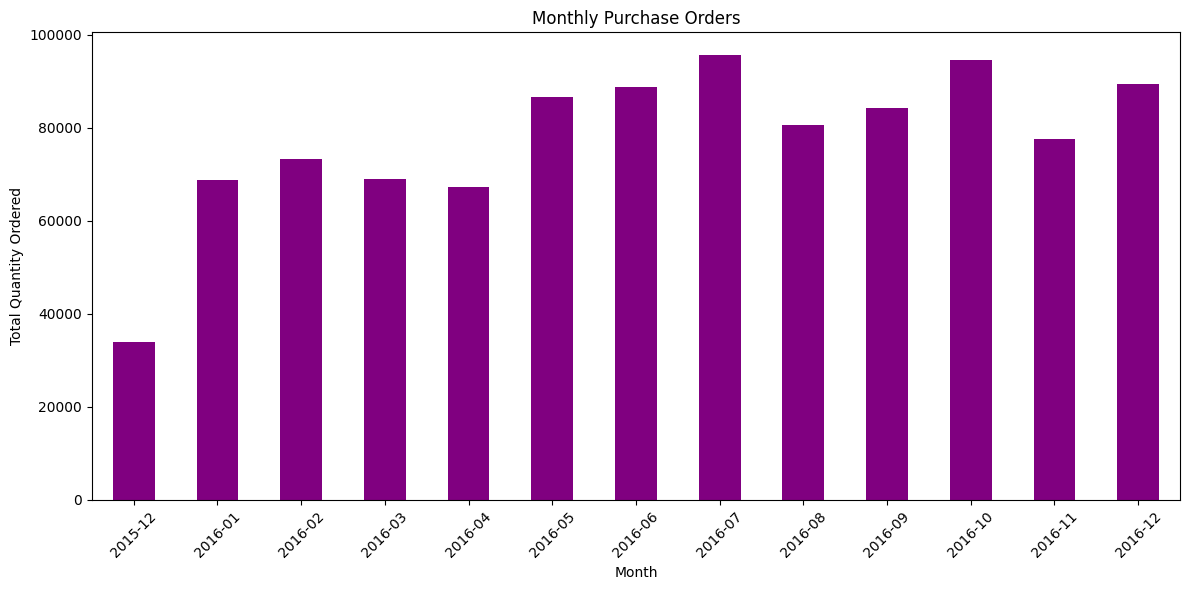

In [27]:
# 8. Purchase Order Patterns
monthly_purchases = purchases.groupby(purchases['PODate'].dt.to_period('M'))['Quantity'].sum()
plt.figure(figsize=(12, 6))
monthly_purchases.plot(kind='bar', color='purple')
plt.title('Monthly Purchase Orders')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()



## Lead time analysis



Lead Time Analysis

Lead Time Summary Statistics:
count   70426.00
mean        7.98
std         2.23
min         3.00
25%         6.00
50%         8.00
75%        10.00
max        14.00
Name: lead_time, dtype: float64


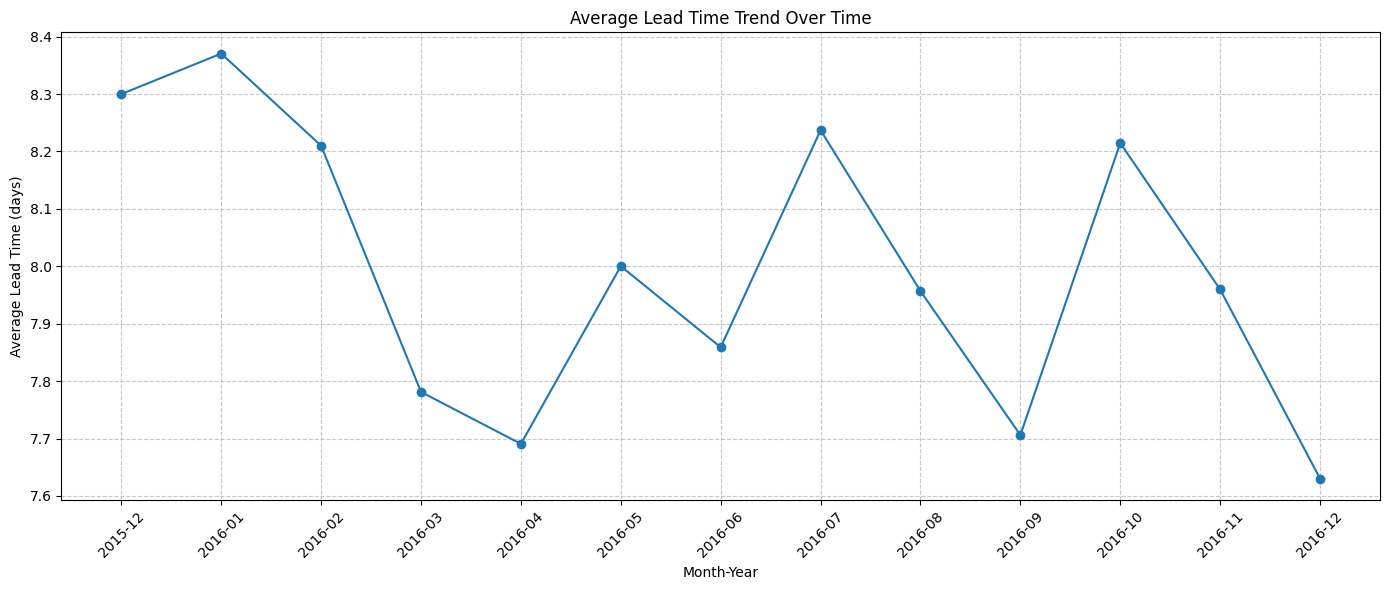

In [28]:

purchases['lead_time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

print("\n\n" + "="*50)
print("Lead Time Analysis")
print("="*50)

print("\nLead Time Summary Statistics:")
print(purchases['lead_time'].describe())



# Analyze changes in lead time over time
purchases['month_year'] = purchases['PODate'].dt.to_period('M')
lead_time_trend = purchases.groupby('month_year')['lead_time'].mean().reset_index()
lead_time_trend['month_year'] = lead_time_trend['month_year'].astype(str)

plt.figure(figsize=(14, 6))
plt.plot(lead_time_trend['month_year'], lead_time_trend['lead_time'], marker='o')
plt.title('Average Lead Time Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



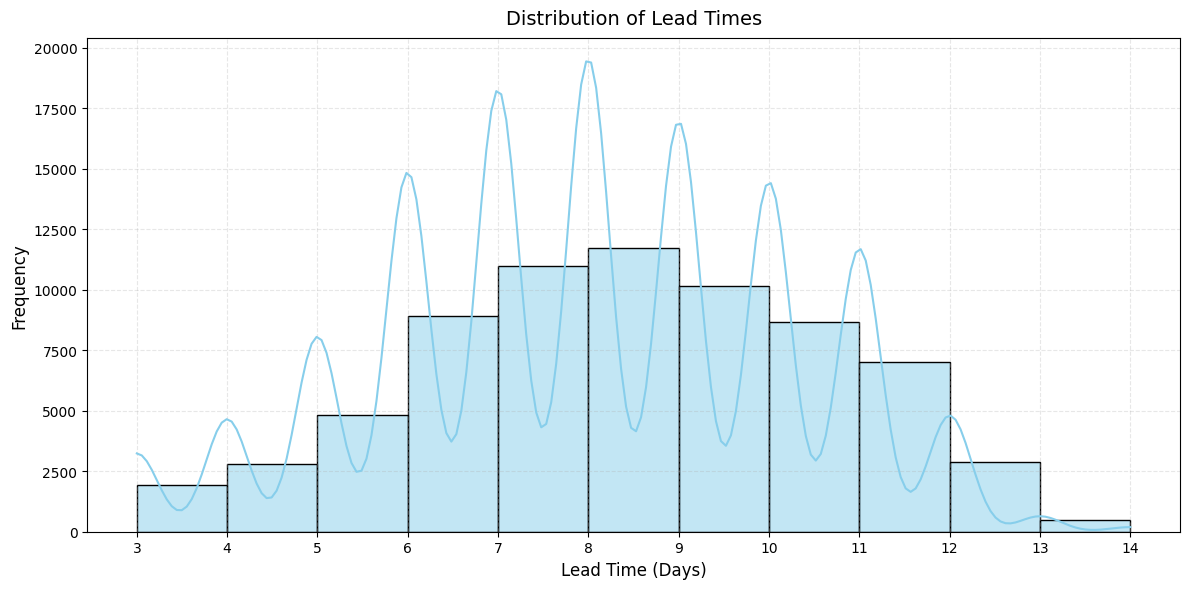

In [29]:
# 4. Lead Time Analysis (time between PO and Receiving)
purchases['LeadTime'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
# Assuming purchases DataFrame is already loaded and 'LeadTime' is calculated
# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram with integer bins (one bin per day from 3 to 14)
bins = range(3, 15)  # Creates bins [3-4, 4-5, ..., 13-14]
sns.histplot(data=purchases, x='LeadTime', bins=bins, kde=True, 
             stat='count', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Lead Times', fontsize=14, pad=10)
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

# Ensure x-axis shows integer ticks
plt.xticks(range(3, 15))

# Adjust layout and save
plt.tight_layout()
plt.show()